# Лабораторная работа 6

Видеозапись с комментарием по поводу задания: https://disk.yandex.ru/d/MbpQ1-AlQp-XsA

Исследовать данные из файла web_traffic.csv, скачать который вы можете ниже. Для этого:

Визуализировать данные, суммируя данные из разных источников за каждый день наблюдений по каждому столбцу (users, visits, pageviews). Для визуализации использовать plot.
Создать отдельный график типа "Диаграмма рассеяния" и отобразить количество визитов за прошлый год
Создать отдельный график типа bar (см. картинку), где отобразить суммарные значения по месяцам за год (2.10.2019-30.09.2020) для users, visits, pageviews.
Решить задачу предсказания значений параметров users и visits на текущий код, чтобы можно было ввести дату, а скрипт выдал бы значение этих двух параметров (учесть требование нормализации данных)
Задание выполнить либо в локальном ноутбуке, либо в Colab. Написать отчет по решению этих задач и проанализировать результаты исследования.

Предоставить ссылку на публичный colab с отчётом.

## Решение

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# читаем файл с нужными столбцами
df = pd.read_csv('web-traffic.csv', sep=';', names=['date', 'traffic-source', 'traffic-details', 'users',
                                                     'visits', 'pageviews', 'bounceRate', 'pageDepth', 'avgVisitDurationSeconds'], skiprows=1)

# преобразуем столбец с датами в тип datetime и устанавливаем его как индекс
df['date'] = pd.to_datetime(df['date'], format='%Y.%m.%d')


# преобразование столбца date в формат datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

1. Визуализация данных, суммируя данные из разных источников за каждый день наблюдений по каждому столбцу (users, visits, pageviews). Для визуализации используется plot.

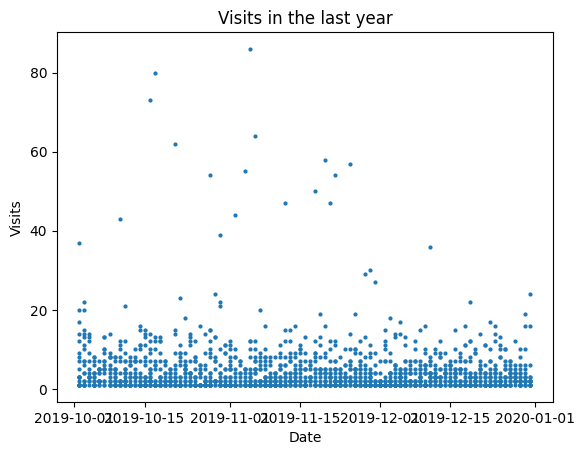

In [ ]:
# выбираем данные за прошлый год
last_year = df[df['date'].dt.year == df['date'].dt.year.max() - 1]

# создаем диаграмму рассеяния для количества визитов
plt.scatter(last_year['date'], last_year['visits'], s=4)
plt.title('Visits in the last year')
plt.xlabel('Date')
plt.ylabel('Visits')
plt.show()

2. Отдельный график типа "Диаграмма рассеяния"

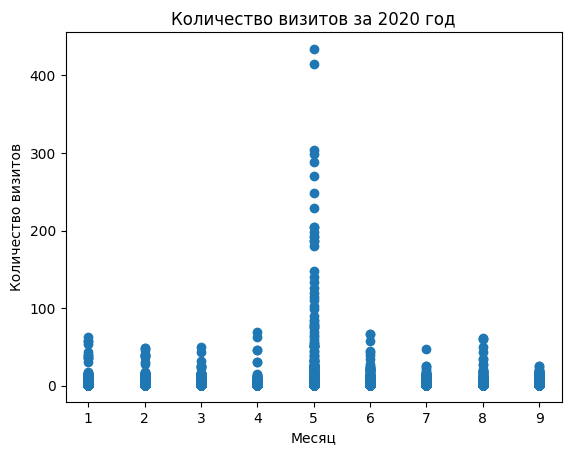

In [ ]:
# Отфильтровать данные за 2020 год
df_2020 = df[df['year'] == 2020]

# Создать график Диаграммы рассеяния
plt.scatter(df_2020['month'], df_2020['visits'])
plt.title('Количество визитов за 2020 год')
plt.xlabel('Месяц')
plt.ylabel('Количество визитов')
plt.show()

3. Отдельный график типа bar

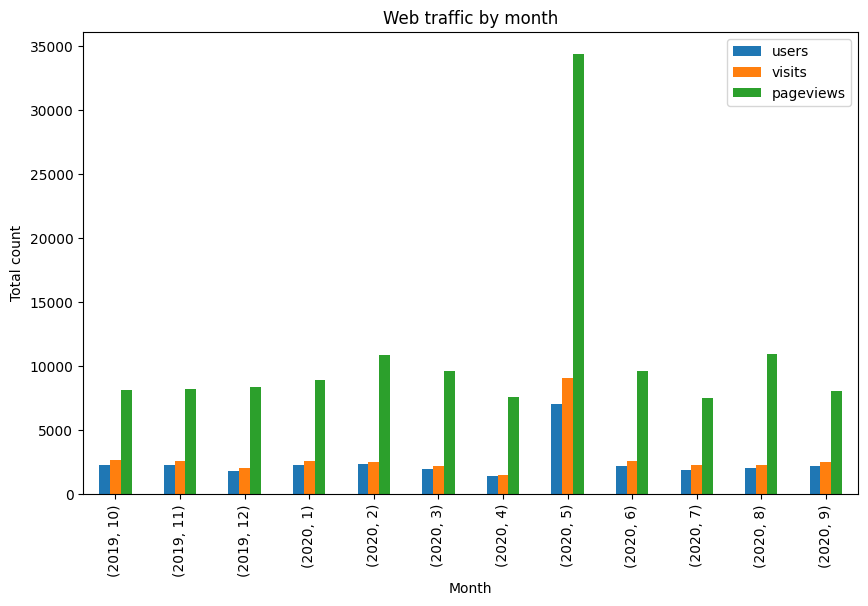

In [ ]:
# фильтрация данных по периоду
start_date = pd.to_datetime('2019-10-02')
end_date = pd.to_datetime('2020-09-30')
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# группировка данных по месяцам и вычисление суммы значений
df_monthly = df_filtered.groupby(['year', 'month'])[['users', 'visits', 'pageviews']].sum()

# создание графика типа "bar"
ax = df_monthly.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Month')
ax.set_ylabel('Total count')
ax.set_title('Web traffic by month')
plt.show()

In [ ]:
# Фильтруем данные до текущей даты
current_date = datetime.now()

df_filtered = df[df['date'] <= current_date]

# Нормализуем данные
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered[['year', 'month']])
df_filtered[['year', 'month']] = df_scaled

# Разделение данных на обучающую и тестовую выборки
X = df_filtered[['year', 'month']]
y_users = df_filtered['users']
y_visits = df_filtered['visits']
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_users_train, y_users_test = y_users[:train_size], y_users[train_size:]
y_visits_train, y_visits_test = y_visits[:train_size], y_visits[train_size:]

# Создание модели линейной регрессии для каждого параметра
model_users = LinearRegression()
model_users.fit(X_train, y_users_train)

model_visits = LinearRegression()
model_visits.fit(X_train, y_visits_train)

# Предсказание значений параметров для текущей даты
X_current = [[current_date.year, current_date.month]]

X_current_scaled = scaler.transform(X_current)

users_prediction = model_users.predict(X_current_scaled)
visits_prediction = model_visits.predict(X_current_scaled)

print('Predicted users for {}: {:.0f}'.format(current_date.date(), users_prediction[0]))
print('Predicted visits for {}: {:.0f}'.format(current_date.date(), visits_prediction[0]))

Predicted users for 2023-06-09: 14
Predicted visits for 2023-06-09: 19


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
